In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('./MY2022 Fuel Consumption Ratings.csv')

In [3]:
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


- Model Year : 차량 연식
- Make  : 차량 제조사
- Model : 차량 모델 유형: 4WD/4X4 = 4륜 구동; AWD = 전 륜구동; FFV = 유연한 연료 차량; SWB = 짧은 휠베이스; LWB = 긴 휠베이스; EWB = 확장
- Vehicle Class : 자동차 차량 클래스
- Engine size(L) : 엔진 크기(리터)
- Cylinders : 실린더 수
- Transmission : 변속기: A = 자동; AM = 자동 수동; AS = 선택 시프트로 자동; AV = 연속 가변; M = 수동; 3 – 10 = 기어 수
- Fuel Type : 연료 종류
- Fuel Consumption (City (L/100 km) : 도시 및 고속도로 연료 소비량 등급은 100km당 리터(L/100km)로 표시됩니다
- Fuel Consumption(Hwy (L/100 km)) : 결합된 등급(55% 도시, 45% 고속도로)은 L/100km
- Fuel Consumption(Comb (L/100 km))
- Fuel Consumption(Comb (mpg)) : 결합된 등급(55% 도시, 45% 고속도로)은 갤런당 마일
- CO2 Emissions(g/km) : CO2 배출량: 도심 및 고속도로 결합 시 배기관의 이산화탄소 배출량(킬로미터당 그램 단위)
- CO2 Rating : CO2 등급: 1(최악)에서 10(최상)까지 등급이 지정된 이산화탄소의 배기관 배출
- Smog Rating : 스모그 등급: 1(최악)에서 10(최상)까지 등급이 매겨진 스모그 형성 오염물질의 배기관 배출

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [5]:
df.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


In [6]:
df.nunique().sort_values(ascending = False)

Model                                715
CO2 Emissions(g/km)                  242
Fuel Consumption (City (L/100 km)    149
Fuel Consumption(Comb (L/100 km))    131
Fuel Consumption(Hwy (L/100 km))     107
Fuel Consumption(Comb (mpg))          49
Make                                  39
Engine Size(L)                        36
Transmission                          23
Vehicle Class                         14
CO2 Rating                            10
Cylinders                              8
Smog Rating                            5
Fuel Type                              4
Model Year                             1
dtype: int64

<AxesSubplot:>

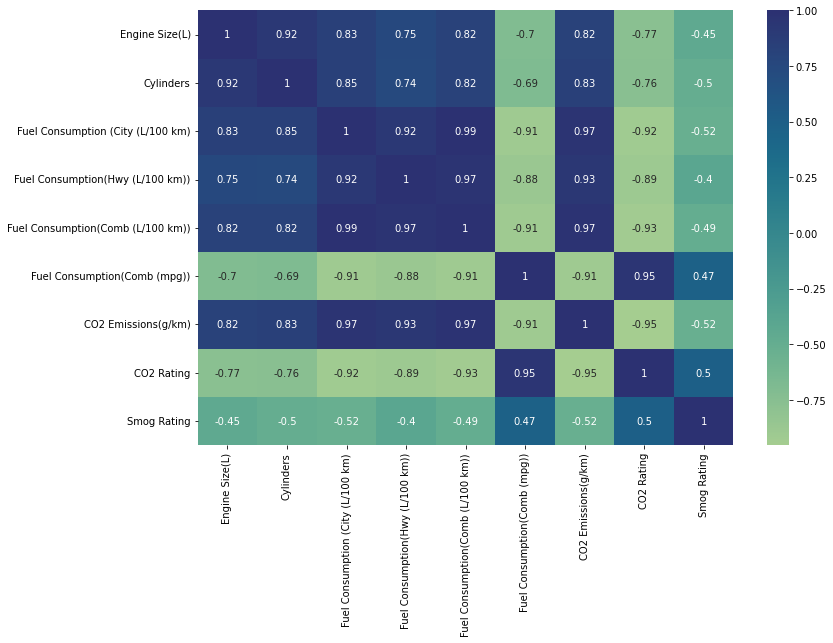

In [36]:
#Lets look what are the correlations betwenn the numerical atributtes
corr_matrix = df.drop(['Model Year'], axis = 1).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot = True, cmap='crest')

In [39]:
corr_matrix

,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
Engine Size(L),1.000000,0.920698,0.834925,0.749374,0.818694,-0.704163,0.824188,-0.766333,-0.448239
Cylinders,0.920698,1.000000,0.845688,0.737652,0.821718,-0.693594,0.833241,-0.762157,-0.502149
Fuel Consumption (City (L/100 km),0.834925,0.845688,1.000000,0.922850,0.990321,-0.909477,0.965632,-0.920524,-0.523928
Fuel Consumption(Hwy (L/100 km)),0.749374,0.737652,0.922850,1.000000,0.967138,-0.877531,0.933991,-0.894668,-0.402099
Fuel Consumption(Comb (L/100 km)),0.818694,0.821718,0.990321,0.967138,1.000000,-0.914305,0.971671,-0.927705,-0.490473
Fuel Consumption(Comb (mpg)),-0.704163,-0.693594,-0.909477,-0.877531,-0.914305,1.000000,-0.913019,0.949561,0.473990
CO2 Emissions(g/km),0.824188,0.833241,0.965632,0.933991,0.971671,-0.913019,1.000000,-0.954593,-0.520437
CO2 Rating,-0.766333,-0.762157,-0.920524,-0.894668,-0.927705,0.949561,-0.954593,1.000000,0.502625
Smog Rating,-0.448239,-0.502149,-0.523928,-0.402099,-0.490473,0.473990,-0.520437,0.502625,1.000000


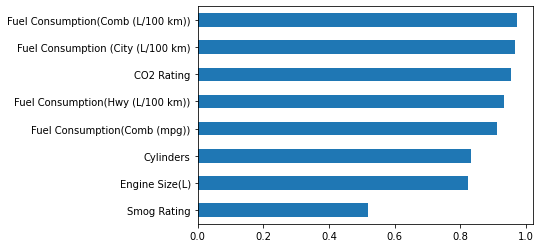

In [8]:
corr_matrix = abs(corr_matrix['CO2 Emissions(g/km)']).sort_values(ascending = True)[:-1].plot.barh()

<Figure size 1080x576 with 0 Axes>

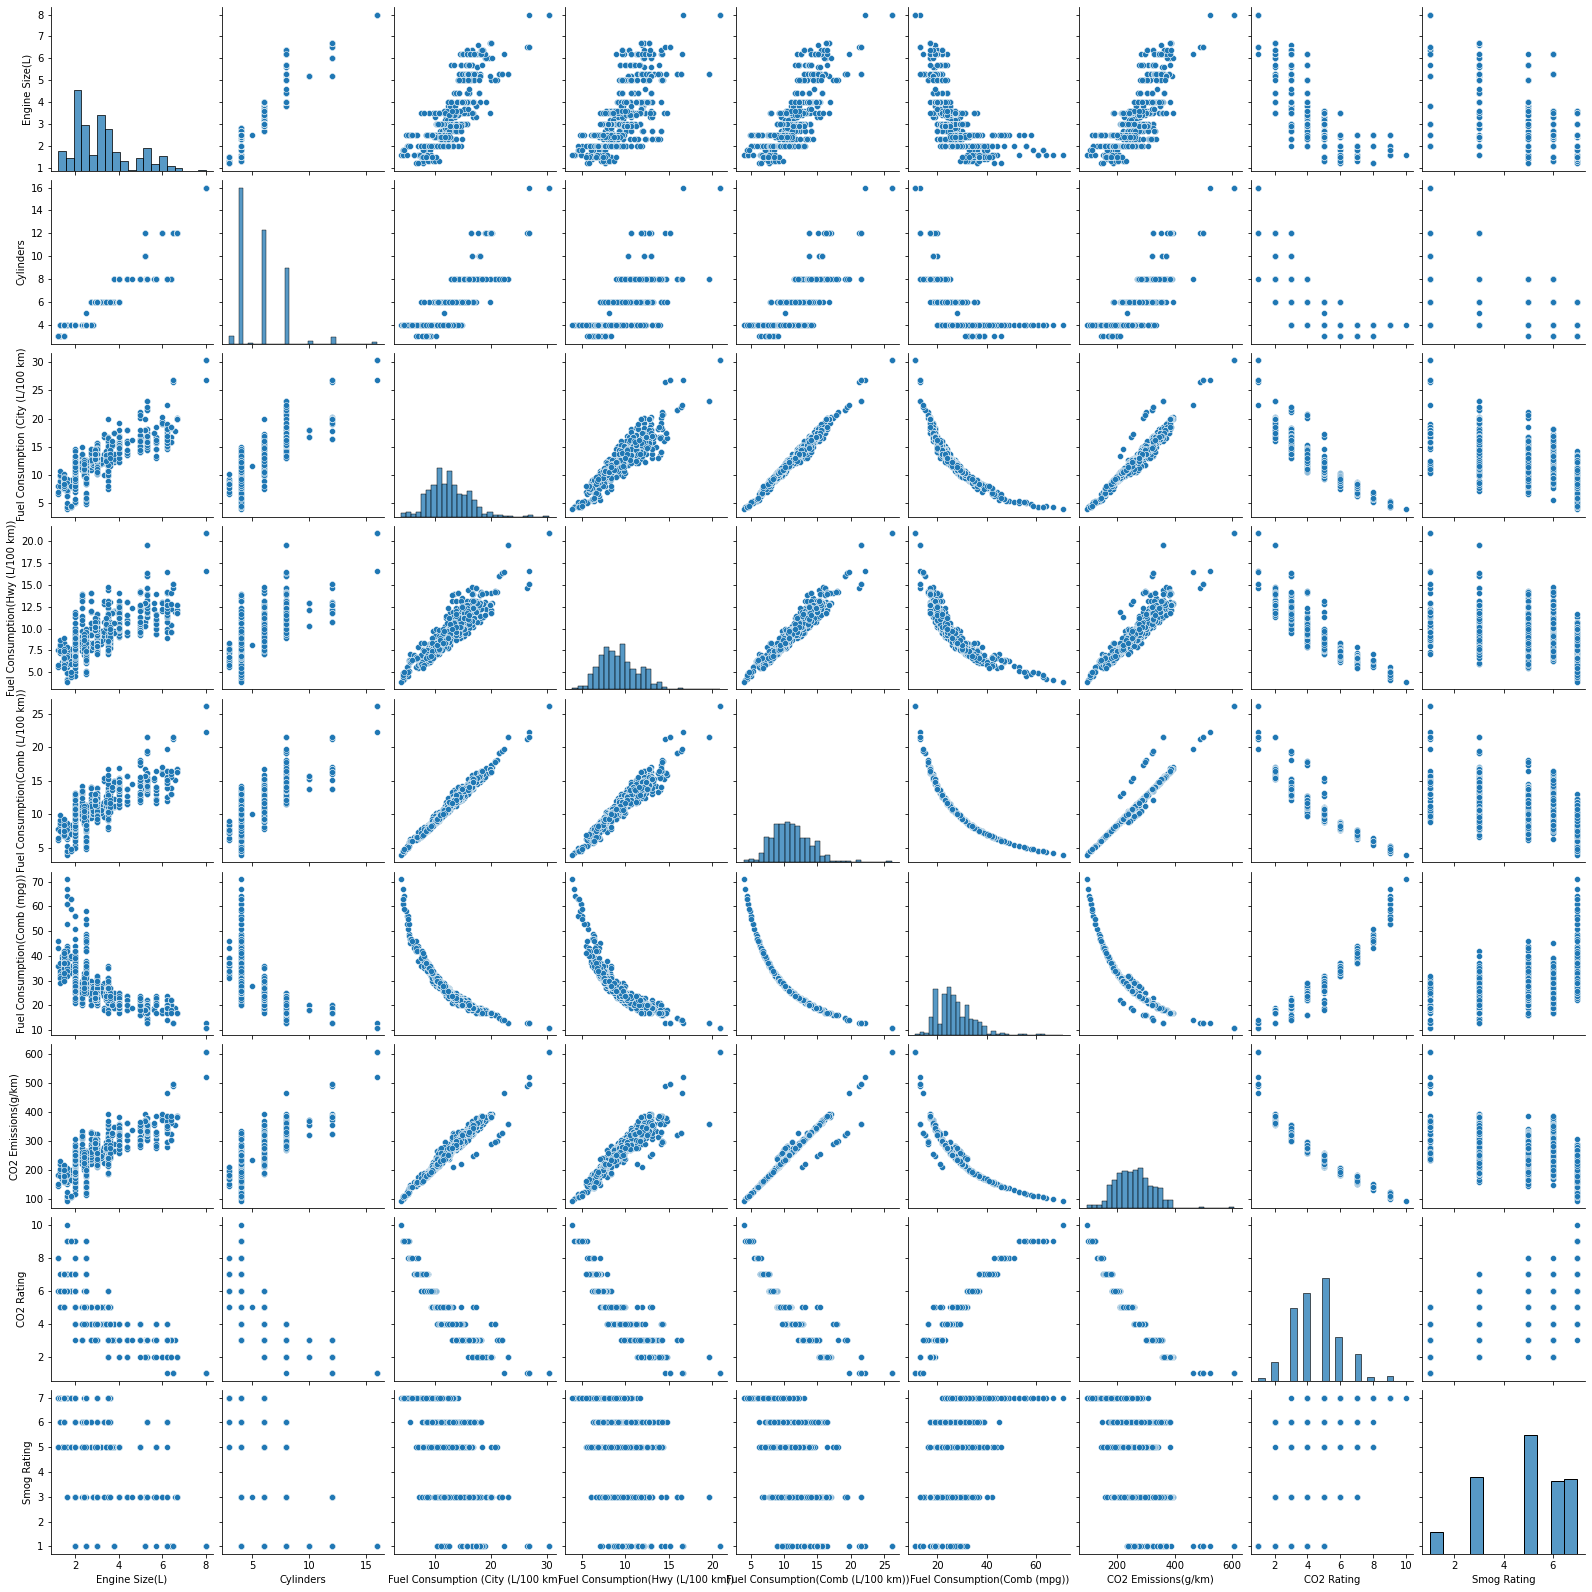

In [9]:
plt.figure(figsize = (15,8))
sns.pairplot(df.drop('Model Year', axis = 1))

<Figure size 1440x864 with 0 Axes>

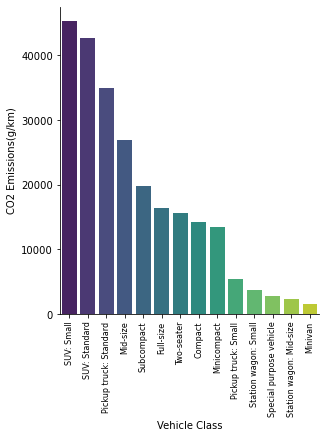

In [10]:
#Now lets look at the cateogorical attributes.
df_make = df[['Vehicle Class', 'CO2 Emissions(g/km)']]
df_make = df_make.groupby('Vehicle Class').sum().sort_values(by = 'CO2 Emissions(g/km)', ascending = False)[:20].reset_index()
plt.figure(figsize = (20,12))
sns.catplot(x = 'Vehicle Class', y = 'CO2 Emissions(g/km)', kind = 'bar', data = df_make, palette='viridis')
plt.xticks(rotation = 90, fontsize = 8)
plt.show()

<Figure size 1440x864 with 0 Axes>

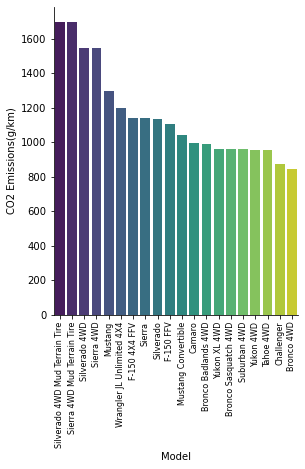

In [11]:
df_make = df[['Model', 'CO2 Emissions(g/km)']]
df_make = df_make.groupby('Model').sum().sort_values(by = 'CO2 Emissions(g/km)', ascending = False)[:20].reset_index()
plt.figure(figsize = (20,12))
sns.catplot(x = 'Model', y = 'CO2 Emissions(g/km)', kind = 'bar', data = df_make, palette='viridis')
plt.xticks(rotation = 90, fontsize = 8)
plt.show()

<Figure size 1440x864 with 0 Axes>

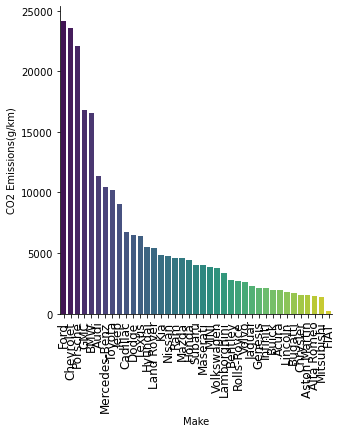

In [12]:
df_make = df[['Make', 'CO2 Emissions(g/km)']]
df_make = df_make.groupby('Make').sum().sort_values(by = 'CO2 Emissions(g/km)', ascending = False).reset_index()
plt.figure(figsize = (20,12))
sns.catplot(x = 'Make', y = 'CO2 Emissions(g/km)', kind = 'bar', data = df_make, palette='viridis')
plt.xticks(rotation = 90, fontsize = 12)
plt.show()

<Figure size 1440x864 with 0 Axes>

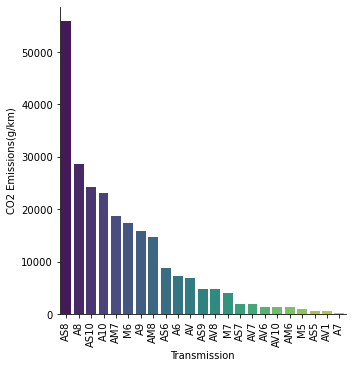

In [13]:
df_make = df[['Transmission', 'CO2 Emissions(g/km)']]
df_make = df_make.groupby('Transmission').sum().sort_values(by = 'CO2 Emissions(g/km)', ascending = False).reset_index()
plt.figure(figsize = (20,12))
sns.catplot(x = 'Transmission', y = 'CO2 Emissions(g/km)', kind = 'bar', data = df_make, palette='viridis')
plt.xticks(rotation = 90, fontsize = 10)
plt.show()

In [49]:
df_make

,Fuel Type,CO2 Emissions(g/km)
0,Z,127484
1,X,105961
2,D,7604
3,E,4128


<Figure size 1440x864 with 0 Axes>

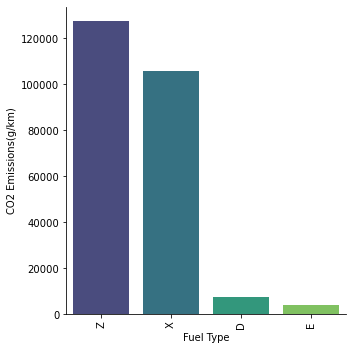

In [14]:
df_make = df[['Fuel Type', 'CO2 Emissions(g/km)']]
df_make = df_make.groupby('Fuel Type').sum().sort_values(by = 'CO2 Emissions(g/km)', ascending = False).reset_index()
plt.figure(figsize = (20,12))
sns.catplot(x = 'Fuel Type', y = 'CO2 Emissions(g/km)', kind = 'bar', data = df_make, palette='viridis')
plt.xticks(rotation = 90, fontsize = 10)
plt.show()

In [15]:
#First we are gonna create the test set and train set for our model
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [16]:
#Separating the attributes that are gonna feed our model
num_attributes = ['Engine Size(L)', 'Fuel Consumption (City (L/100 km)', 
                 'Fuel Consumption(Comb (L/100 km))','Fuel Consumption(Hwy (L/100 km))',
                 'Fuel Consumption(Comb (mpg))',
                  'CO2 Rating']
cat_attributes = ['Make', 'Vehicle Class', 'Fuel Type', 'Transmission']

In [17]:
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(sparse=False))
])

In [18]:
preprocess_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', cat_pipeline, cat_attributes)
])

In [19]:
preprocess_pipeline.fit(df[num_attributes + cat_attributes])
X_train = preprocess_pipeline.transform(train_set[num_attributes + cat_attributes])
X_train

array([[ 0.87422991,  0.40390249,  0.31582796, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.29202541,  0.31695147,  0.24625682, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.29202541, -0.0308526 , -0.27552671, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.58128135, -0.69747706, -0.69295353, ...,  0.        ,
         0.        ,  0.        ],
       [-1.23626141, -1.16121582, -1.24952264, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.87422991,  1.04154328,  0.9419682 , ...,  0.        ,
         0.        ,  0.        ]])

In [20]:
y_train = train_set['CO2 Emissions(g/km)']
y_train

77     279
247    277
250    242
82     214
549    157
      ... 
106    279
270    305
860    213
435    175
102    322
Name: CO2 Emissions(g/km), Length: 756, dtype: int64

## building the model
Lets start with the model creation, we are gonna see how it goes with a Decision tree but im gonna try go with a Random Forest to see if it does a little better. but first im gonna create a function to see the score of the model.

In [21]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard deviation: ', scores.std())

In [22]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

In [23]:
from sklearn.model_selection import cross_val_score # k 교차검증
tree_scores = cross_val_score(tree_reg, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-tree_scores) # 제곱근
display_scores(tree_rmse_scores)

Scores:  [28.7289969   2.75776416  6.92060235 12.54226772  3.96365063  2.34240093
  2.32665712  2.30940108  2.40123425  4.39127924]
Mean:  6.868425436650405
Standard deviation:  7.89559597021513


In [24]:
from sklearn import tree

In [25]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [26]:
text_representation = tree.export_text(tree_reg)
print(text_representation)

|--- feature_5 <= -0.03
|   |--- feature_2 <= 0.82
|   |   |--- feature_2 <= 0.33
|   |   |   |--- feature_2 <= 0.16
|   |   |   |   |--- feature_59 <= 0.50
|   |   |   |   |   |--- feature_2 <= 0.09
|   |   |   |   |   |   |--- feature_2 <= 0.02
|   |   |   |   |   |   |   |--- feature_75 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_0 <= -0.51
|   |   |   |   |   |   |   |   |   |--- feature_69 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= -0.09
|   |   |   |   |   |   |   |   |   |   |   |--- value: [261.00]
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  -0.09
|   |   |   |   |   |   |   |   |   |   |   |--- value: [260.00]
|   |   |   |   |   |   |   |   |   |--- feature_69 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- value: [263.00]
|   |   |   |   |   |   |   |   |--- feature_0 >  -0.51
|   |   |   |   |   |   |   |   |   |--- feature_4 <= -0.23
|   |   |   |   |   |   |   |   |   |   |--- value: [260.00]
|   |   |   |   |   |   |   |

Ok, thats a really good score but lets see if a Random forest does better

In [27]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

In [28]:
forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [13.09641894  5.67430926  2.94027983  6.47810425  4.56784351  2.40459549
  2.10341985  2.14616298  4.35783544  3.05948016]
Mean:  4.682844971624642
Standard deviation:  3.1474354257605337


## Tuning the model

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=10, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [30]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [31]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [32]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

13.985625087791915 {'max_features': 2, 'n_estimators': 3}
10.34089206628579 {'max_features': 2, 'n_estimators': 10}
8.914504869199874 {'max_features': 2, 'n_estimators': 30}
10.14654407058088 {'max_features': 4, 'n_estimators': 3}
9.559574891335613 {'max_features': 4, 'n_estimators': 10}
8.109191361545053 {'max_features': 4, 'n_estimators': 30}
11.113007697051408 {'max_features': 6, 'n_estimators': 3}
7.389994884692824 {'max_features': 6, 'n_estimators': 10}
6.597494176169871 {'max_features': 6, 'n_estimators': 30}
11.291652022797283 {'max_features': 8, 'n_estimators': 3}
8.300774979733122 {'max_features': 8, 'n_estimators': 10}
6.83967193431107 {'max_features': 8, 'n_estimators': 30}
11.619109456841652 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
8.67099869914336 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
10.786177779529593 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
8.268506872559245 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [33]:
from sklearn.metrics import mean_squared_error
final_model = grid_search.best_estimator_
X_test = preprocess_pipeline.transform(test_set[num_attributes + cat_attributes])
y_test = test_set['CO2 Emissions(g/km)']
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

5.145333176401949